<a href="https://colab.research.google.com/github/Chromathiccc/Colab_notebooks/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# import required variables
import pandas as pd
import numpy as np
# sklearn for ML models
from sklearn.linear_model import LinearRegression
# seaborn visualisation library
import seaborn as sns
# plotting library
import matplotlib.pyplot as plt
# evaluations
from sklearn import metrics
# python stats library
import statsmodels.formula.api as sm

In [42]:
df = pd.read_csv('/content/Adevrtising.csv')
df.head(200)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df[:10]# same as df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
# Check number of columns and rows
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 200 rows and 4 columns


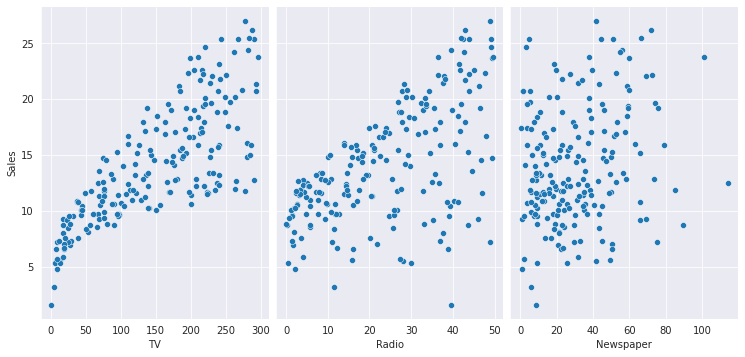

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', height = 5, aspect = 0.7)

In [ ]:
# Create x and y
# column / features representing 'X'
feature_cols_TV = ['TV']
feature_cols_Radio = ['Radio']
feature_cols_Newspaper = ['Newspaper']

TV = df[feature_cols_TV]
Radio = df[feature_cols_Radio]
Newspaper = df[feature_cols_Radio]

# What you want to learn predict
Sales = df.Sales

# type check
print(f'Type of TV {type(TV)}')
print(f'Type of Radio {type(Radio)}')
print(f'Type of Newspaper {type(Newspaper)}')
print(f'Type of Sales {type(Sales)}')

Type of TV <class 'pandas.core.frame.DataFrame'>
Type of Radio <class 'pandas.core.frame.DataFrame'>
Type of Newspaper <class 'pandas.core.frame.DataFrame'>
Type of Sales <class 'pandas.core.series.Series'>


In [ ]:
simple_lm_TV = LinearRegression()
simple_lm_Radio = LinearRegression()
simple_lm_Newspaper = LinearRegression()

simple_lm_TV.fit(TV, Sales)
simple_lm_Radio.fit(Radio, Sales)
simple_lm_Newspaper.fit(Newspaper, Sales)

LinearRegression()

In [ ]:
# print coefficients
print('TV')
print('Intercept : ', simple_lm_TV.intercept_)
print('Co-efficient : ' ,simple_lm_TV.coef_)

print('Radio')
print('Intercept : ', simple_lm_Radio.intercept_)
print('Co-efficient : ' ,simple_lm_Radio.coef_)

print('Newspaper')
print('Intercept : ', simple_lm_Newspaper.intercept_)
print('Co-efficient : ' ,simple_lm_Newspaper.coef_)

TV
Intercept :  7.032593549127695
Co-efficient :  [0.04753664]
Radio
Intercept :  9.311638095158283
Co-efficient :  [0.20249578]
Newspaper
Intercept :  9.311638095158283
Co-efficient :  [0.20249578]


In [ ]:
#rpediction with sklearn

TV_investing = 230
Radio_investing = 230
Newspaper_investing = 230

print (f'Investing {TV_investing} in TV will generate {simple_lm_TV.predict([[TV_investing]])} in Sales')
print (f'Investing {Radio_investing} in Radio will generate {simple_lm_Radio.predict([[Radio_investing]])} in Sales')
print (f'Investing {Newspaper_investing} in Newspaper will generate {simple_lm_TV.predict([[Newspaper_investing]])} in Sales')

Investing 230 in TV will generate [17.96602085] in Sales
Investing 230 in Radio will generate [55.88566828] in Sales
Investing 230 in Newspaper will generate [17.96602085] in Sales


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [39]:
# Returns all records of tv with sales between 225 and 235 
tv_230s = df.loc[(df['TV'] >= 225) & (df['TV'] <= 235)]
radio_230s = df.loc[(df['Radio'] >= 225) & (df['Radio'] <= 235)]
newspaper_230s = df.loc[(df['Newspaper'] >= 225) & (df['Newspaper'] <= 235)]

In [40]:
print (f'Mean sales increase {tv_230s.Sales.mean()}')
print (f'Mean sales increase {radio_230s.Sales.mean()}')
print (f'Mean sales increase {newspaper_230s.Sales.mean()}')

Mean sales increase 16.5375
Mean sales increase nan
Mean sales increase nan


In [51]:
TV_predictions = simple_lm_TV.predict(TV)
Radio_predictions = simple_lm_Radio.predict(Radio)
Newspaper_predictions = simple_lm_Newspaper.predict(Newspaper)

In [54]:
df_eval_TV = pd.DataFrame({'TV Actual' : Sales , 'Predicted' : TV_predictions})
df_eval_TV.head()

,TV Actual,Predicted
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


In [55]:
df_eval_Radio = pd.DataFrame({'Radio Actual' : Sales , 'Predicted' : Radio_predictions})
df_eval_Radio.head()

,Radio Actual,Predicted
0,22.1,16.965979
1,10.4,17.269722
2,9.3,18.606195
3,18.5,17.674714
4,12.9,11.498593


In [56]:
df_eval_Newspaper = pd.DataFrame({'Newspaper Actual' : Sales , 'Predicted' : Newspaper_predictions})
df_eval_Newspaper.head()

,Newspaper Actual,Predicted
0,22.1,16.965979
1,10.4,17.269722
2,9.3,18.606195
3,18.5,17.674714
4,12.9,11.498593


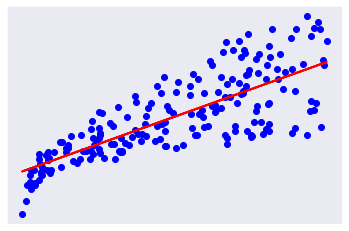

In [66]:
# TV plots 

plt.scatter (TV, Sales, color = 'blue') # actual values from the dataset 
plt.plot(TV, TV_predictions, color = 'red', linewidth = 2) # predicted values by the model

plt.xticks(())
plt.yticks(())

plt.show()

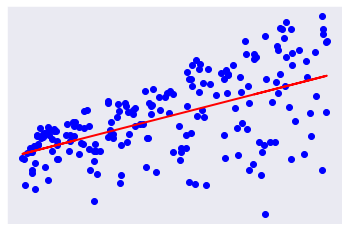

In [67]:
# Radio plots

plt.scatter (Radio, Sales, color = 'blue') # actual values from the dataset 
plt.plot(Radio, Radio_predictions, color = 'red', linewidth = 2) # predicted values by the model

plt.xticks(())
plt.yticks(())

plt.show()

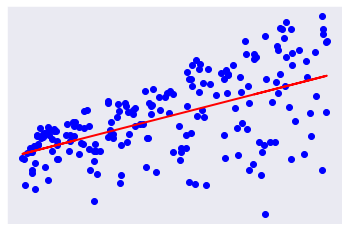

In [68]:
# Newspaper plots

plt.scatter (Newspaper, Sales, color = 'blue') # actual values from the dataset 
plt.plot(Newspaper, Newspaper_predictions, color = 'red', linewidth = 2) # predicted values by the model

plt.xticks(())
plt.yticks(())

plt.show()

In [70]:
# TV error metrics

print ('Mean Absolute Error: ', metrics.mean_absolute_error(Sales, TV_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Sales, TV_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Sales, TV_predictions)))

Mean Absolute Error:  2.549806038927486
Mean Squared Error: 10.512652915656757
Root Mean Squared Error: 3.2423221486546887


In [75]:
# create a fitted model (predict sales given tv investment)
lm1 = sm.ols(formula = 'Sales ~ TV', data = df).fit()

# check coefficients
print(lm1.params)

Intercept    7.032594
TV           0.047537
dtype: float64


0    17.966021
dtype: float64

In [77]:
# And also we can perform predictions same way
# Lets check how much sales increase would be if we invest 230 in TV Adverts
TV_new = pd.DataFrame({'TV': [230]})
# predict for a new observation
lm1.predict(TV_new)

0    17.966021
dtype: float64

In [76]:
# print the p-values for the model coefficients
print(f'The p value is {lm1.pvalues}')

The p value is Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [78]:
a = 1.467390e-42
output = f"{a:.50f}"
print('The p-value is ',output)

The p-value is  0.00000000000000000000000000000000000000000146739000


In [79]:
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

In [80]:
model = LinearRegression()
model.fit(X,Y)
# print the coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 2.938889369459412
Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]
